
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Distribution of Income Tax
https://data.cso.ie/table/RVA02

Magnificent 7 Stock Prices Analysis - yfinance

House Prices Analysis Ireland
https://www.kaggle.com/datasets/raphaelmapp/ireland-house-prices-2010-to-2023
Get later version from property price register??




# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the 'magnificent 7' technology companies that dominate the S&P 500 stock exchange. These are the largest techoligical companies in the world & have historically made up a significant % weighting of the Market Capitalisation of the S&P 500. <get link for this>
 
NVIDIA Corporation (NVDA)
Apple Inc (AAPL) 
Alphabet, Inc. (GOOG) *Previously named Google
Microsoft Corporation (MSFT)
Amazon (AMZN)
Meta Platforms, Inc. (META) *Previously named Facebook
Netflix (NFLX)  
   

The goal of the assigment is to demonstrate tools learned in the module

In [10]:
# Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Install yfinance if not already installed
!pip install yfinance


# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
 # Set up the function 'get_data()' that can be called for closing prices of FAANG stocks over the last 10 years
def get_data():    
    df = yf.download("META AAPL AMZN NFLX GOOG NVDA MSFT", start="2015-01-01" ,end='2025-11-01', interval = '1d', group_by='ticker', auto_adjust=True, threads=True)
    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 # Call the function
df = get_data()

[*********************100%***********************]  7 of 7 completed


In [ ]:
# Set Filename
filename = "Magnificent 7 Stock Price History - 2015- Oct 2025 .csv"

# Save to CSV
df.to_csv(filename)

In [ ]:
# check for null values
df.isnull().sum()
# References:
# Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html


Ticker  Price 
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NFLX    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [18]:
# Display the first 5 rows of the dataframe
df.head()



Ticker           MSFT                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2015-01-02  39.773205  40.421031  39.670917  39.858444  27913900  24.694227   
2015-01-05  39.526003  39.832869  39.423715  39.491909  39673900  24.006998   
2015-01-06  39.534548  39.849937  38.818527  38.912292  36447900  23.619029   
2015-01-07  39.193568  39.602722  38.775892  39.406670  29114100  23.765348   
2015-01-08  39.849932  40.702337  39.824361  40.565952  29645200  24.215380   

Ticker                                                  ...       META  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2015-01-02  24.705313  23.798593  24.237543  212818400  ...  78.098546   
2015-01-05  24.086807  23.368526  23.554747  257142000  ...  77.502225   
2015-01-06  23.816334  23.195597  23.556955  263188400  ...  76.756826   
2015-01-07  23.987040  23.654503  23.887280  160423600  ...  76.289704   
2015-01-08  24.862719  24.097882  24.805079  237458000  ...  76.269817   

Ticker                                                    AMZN           \
Price            High        Low      Close    Volume     Open     High   
Date                                                                      
2015-01-02  78.446400  77.223933  77.969337  18177500  15.6290  15.7375   
2015-01-05  78.764440  76.389084  76.717064  26452200  15.3505  15.4190   
2015-01-06  77.114613  74.898280  75.683441  27399300  15.1120  15.1500   
2015-01-07  76.886027  75.355461  75.683441  22045300  14.8750  15.0640   
2015-01-08  77.750693  75.613864  77.700996  23961000  15.0160  15.1570   

Ticker                                  
Price           Low    Close    Volume  
Date                                    
2015-01-02  15.3480  15.4260  55664000  
2015-01-05  15.0425  15.1095  55484000  
2015-01-06  14.6190  14.7645  70380000  
2015-01-07  14.7665  14.9210  52806000  
2015-01-08  14.8055  15.0230  61768000  

[5 rows x 35 columns]

In [17]:
#Displyy the last 5 rows of the dataframe
df.tail()

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-10-27  530.786624  533.581381  528.021779  530.527100  18734700   
2025-10-28  548.972552  552.685573  539.759814  541.057373  29986700   
2025-10-29  543.922012  545.249544  535.727327  540.538330  36023000   
2025-10-30  529.488985  533.970588  521.144617  524.777832  41023100   
2025-10-31  527.891978  528.331159  514.137692  516.842651  34006400   

Ticker            AAPL                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-10-27  264.623466  268.859349  264.393677  268.549652  44888200  ...   
2025-10-28  268.729471  269.628624  267.890289  268.739471  41534800  ...   
2025-10-29  269.019206  271.147148  266.851294  269.438812  51086700  ...   
2025-10-30  271.726571  273.874513  268.219991  271.137146  69886500  ...   
2025-10-31  276.721738  277.051436  268.899335  270.108154  86167100  ...   

Ticker            META                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-10-27  749.729980  755.750000  748.010010  750.820007  11321100   
2025-10-28  752.630005  758.400024  745.520020  751.440002  12193800   
2025-10-29  754.750000  759.159973  742.510010  751.669983  26818600   
2025-10-30  669.150024  680.960022  650.169983  666.469971  88440100   
2025-10-31  674.510010  674.890015  645.570007  648.349976  56953200   

Ticker            AMZN                                                 
Price             Open        High         Low       Close     Volume  
Date                                                                   
2025-10-27  227.660004  228.399994  225.539993  226.970001   38267000  
2025-10-28  228.220001  231.490005  226.210007  229.250000   47100000  
2025-10-29  231.669998  232.820007  227.759995  230.300003   52036200  
2025-10-30  227.059998  228.440002  222.750000  222.860001  102252900  
2025-10-31  250.100006  250.500000  243.979996  244.220001  166340800  

[5 rows x 35 columns]

In [15]:
# Info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2725 entries, 2015-01-02 to 2025-10-31
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (MSFT, Open)    2725 non-null   float64
 1   (MSFT, High)    2725 non-null   float64
 2   (MSFT, Low)     2725 non-null   float64
 3   (MSFT, Close)   2725 non-null   float64
 4   (MSFT, Volume)  2725 non-null   int64  
 5   (AAPL, Open)    2725 non-null   float64
 6   (AAPL, High)    2725 non-null   float64
 7   (AAPL, Low)     2725 non-null   float64
 8   (AAPL, Close)   2725 non-null   float64
 9   (AAPL, Volume)  2725 non-null   int64  
 10  (GOOG, Open)    2725 non-null   float64
 11  (GOOG, High)    2725 non-null   float64
 12  (GOOG, Low)     2725 non-null   float64
 13  (GOOG, Close)   2725 non-null   float64
 14  (GOOG, Volume)  2725 non-null   int64  
 15  (NVDA, Open)    2725 non-null   float64
 16  (NVDA, High)    2725 non-null   float64
 17  (NVDA, Low)    

To do :
1. Plot closing prices

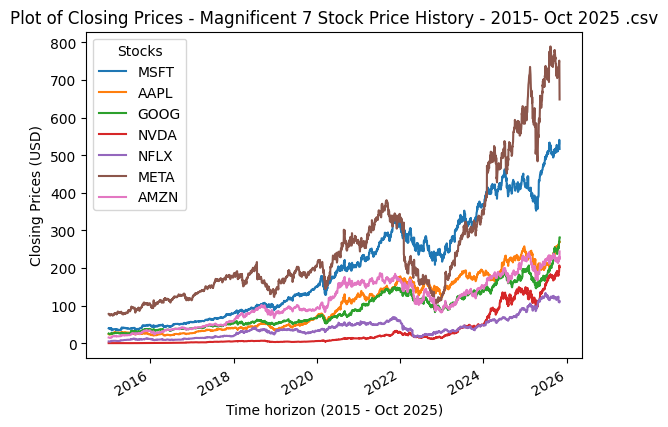

In [33]:
#Closing prices for 7 stocks - put as variable so can easily amend single line if future stocks added
#closing_Prices = df['Close'] - Can't use as multiindex dataframe
closing_Prices = df.xs('Close', level=1, axis=1)    
# References:
# Pandas MultiIndexing - https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing


#Creat new figure and axis
fig, ax = plt.subplots()
# References: 
# Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_Prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (2015 - Oct 2025)")
ax.set_ylabel("Closing Prices (USD)")
#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )



# References: 
# Matplotlib legend - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.Axes.legend.html  

#Legend
ax.legend(title="Stocks", loc="best")

